# 探索的データ分析

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
files = glob.glob("train/*.csv")

In [3]:
data_list = []
for file in files:
    data_list .append(pd.read_csv(file,index_col=0))

C:\Users\komco\AppData\Local\Temp\ipykernel_12416\252572324.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list .append(pd.read_csv(file,index_col=0))
C:\Users\komco\AppData\Local\Temp\ipykernel_12416\252572324.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list .append(pd.read_csv(file,index_col=0))


In [4]:
df = pd.concat(data_list)

In [5]:
df.shape

(637351, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637351 entries, 1060685 to 47003572
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   種類            637351 non-null  object 
 1   地域            0 non-null       float64
 2   市区町村コード       637351 non-null  int64  
 3   都道府県名         637351 non-null  object 
 4   市区町村名         637351 non-null  object 
 5   地区名           637060 non-null  object 
 6   最寄駅：名称        634732 non-null  object 
 7   最寄駅：距離（分）     614306 non-null  object 
 8   間取り           615609 non-null  object 
 9   面積（㎡）         637351 non-null  object 
 10  土地の形状         0 non-null       float64
 11  間口            0 non-null       float64
 12  延床面積（㎡）       0 non-null       float64
 13  建築年           619117 non-null  object 
 14  建物の構造         623423 non-null  object 
 15  用途            591214 non-null  object 
 16  今後の利用目的       275091 non-null  object 
 17  前面道路：方位       0 non-null       float64
 18  前

In [15]:
nonnull_list = []
for col in df.columns:
    nonnull = df[col].count()
    if nonnull == 0:
        nonnull_list.append(col)
df = df.drop(nonnull_list, axis = 1)
# df.drop(nonnull_list, axis=1)

In [20]:
df = df.drop("市区町村名", axis = 1)

In [27]:
df = df.drop("種類", axis = 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637351 entries, 1060685 to 47003572
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   市区町村コード       637351 non-null  int64  
 1   都道府県名         637351 non-null  object 
 2   地区名           637060 non-null  object 
 3   最寄駅：名称        634732 non-null  object 
 4   最寄駅：距離（分）     614306 non-null  object 
 5   間取り           615609 non-null  object 
 6   面積（㎡）         637351 non-null  object 
 7   建築年           619117 non-null  object 
 8   建物の構造         623423 non-null  object 
 9   用途            591214 non-null  object 
 10  今後の利用目的       275091 non-null  object 
 11  都市計画          618786 non-null  object 
 12  建ぺい率（％）       614848 non-null  float64
 13  容積率（％）        614848 non-null  float64
 14  取引時点          637351 non-null  object 
 15  改装            580431 non-null  object 
 16  取引の事情等        18275 non-null   object 
 17  取引価格（総額）_log  637351 non-null  float64
dtypes

In [9]:
pd.set_option("display.max_rows", 500)
df["最寄駅：距離（分）"].value_counts()

最寄駅：距離（分）
6          50928
4          48883
5          45337
8          44277
3          42880
9          38379
7          32369
30分?60分    31999
10         31572
11         30625
2          27100
13         22934
1          19746
14         18759
15         18552
12         15068
16         14354
18         11651
19         10533
20          8910
21          7163
23          6663
25          6169
24          4884
28          4133
26          3996
0           3704
1H?1H30     3624
29          3587
17          2515
22          1082
2H?          826
1H30?2H      692
27           412
Name: count, dtype: int64

In [10]:
df_tmp = df["最寄駅：距離（分）"].replace("1H?1H30", 75)

In [22]:
dis = {
    "30分?60分":45,
    "1H?1H30":75,
    "2H?":120,
    "1H30?2H":105
}

In [25]:
df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].replace(dis).astype(float)

In [26]:
df["最寄駅：距離（分）"].value_counts()

最寄駅：距離（分）
6.0      50928
4.0      48883
5.0      45337
8.0      44277
3.0      42880
9.0      38379
7.0      32369
45.0     31999
10.0     31572
11.0     30625
2.0      27100
13.0     22934
1.0      19746
14.0     18759
15.0     18552
12.0     15068
16.0     14354
18.0     11651
19.0     10533
20.0      8910
21.0      7163
23.0      6663
25.0      6169
24.0      4884
28.0      4133
26.0      3996
0.0       3704
75.0      3624
29.0      3587
17.0      2515
22.0      1082
120.0      826
105.0      692
27.0       412
Name: count, dtype: int64

In [30]:
df["面積（㎡）"] = df["面積（㎡）"].replace("2000㎡以上", 2000).astype(float)

In [32]:
df["面積（㎡）"].value_counts()

面積（㎡）
70.0      83443
65.0      78289
60.0      63257
75.0      56644
20.0      52028
55.0      47184
80.0      39572
50.0      33077
15.0      30853
25.0      24495
85.0      24134
45.0      20661
90.0      15374
40.0      15006
30.0      12428
35.0      11656
95.0      11008
100.0      5426
105.0      3175
110.0      2019
115.0      1484
10.0       1313
120.0       999
125.0       724
130.0       546
135.0       398
145.0       287
140.0       276
150.0       189
155.0       167
160.0       129
180.0       104
170.0        98
165.0        93
190.0        69
185.0        69
175.0        56
210.0        55
200.0        47
230.0        45
195.0        44
220.0        36
250.0        26
240.0        24
260.0        24
270.0        23
290.0        21
340.0        13
320.0        12
310.0        12
330.0        11
390.0        11
360.0        10
370.0         9
450.0         9
480.0         8
440.0         8
350.0         8
280.0         8
300.0         8
2000.0        7
1000.0        6
50

In [41]:
df["建築年"].value_counts().keys()[0].split("平成")[1].split("年")[0]

'3'

In [49]:
y_list = {}
for i in df["建築年"].value_counts().keys():
    if "平成" in i:
        num = float(i.split("平成")[1].split("年")[0])
        year = 33 - num
    if "令和" in i:
        num = float(i.split("令和")[1].split("年")[0])
        year = 3 - num
    if "昭和" in i:
        num = float(i.split("昭和")[1].split("年")[0])
        year = 96 - num
    y_list[i] = year
df["建築年"] = df["建築年"].replace(y_list)

In [64]:
df["建築年"]

ID
1060685     26.0
1005580     39.0
1001363     30.0
1052374      6.0
1059107     39.0
            ... 
47006436     3.0
47016923    16.0
47027429    37.0
47001601     7.0
47003572     7.0
Name: 建築年, Length: 637351, dtype: float64

In [72]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637351 entries, 1060685 to 47003572
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   種類            637351 non-null  object 
 1   地域            0 non-null       float64
 2   市区町村コード       637351 non-null  int64  
 3   都道府県名         637351 non-null  object 
 4   市区町村名         637351 non-null  object 
 5   地区名           637060 non-null  object 
 6   最寄駅：名称        634732 non-null  object 
 7   最寄駅：距離（分）     614306 non-null  float64
 8   間取り           615609 non-null  object 
 9   面積（㎡）         637351 non-null  float64
 10  土地の形状         0 non-null       float64
 11  間口            0 non-null       float64
 12  延床面積（㎡）       0 non-null       float64
 13  建築年           619117 non-null  float64
 14  建物の構造         623423 non-null  object 
 15  用途            591214 non-null  object 
 16  今後の利用目的       275091 non-null  object 
 17  前面道路：方位       0 non-null       float64
 18  前

In [77]:
year = {
    "年第１四半期": ".25",
    "年第２四半期": ".50",
    "年第３四半期": ".75",
    "年第４四半期": ".99",
}

year_list = {}
for i in df["取引時点"].value_counts().keys():
    for k, j in year.items():
        if k in i:
            year_rep = i.replace(k,j)
    year_list[i] = year_rep
df["取引時点"] = df["取引時点"].replace(year_list).astype(float)

In [79]:
df.describe()

,地域,市区町村コード,最寄駅：距離（分）,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log
count,0.0,637351.000000,614306.000000,637351.000000,0.0,0.0,0.0,619117.000000,0.0,0.0,0.0,614848.000000,614848.000000,637351.000000,637351.000000
mean,NaN,18513.985300,11.731487,58.663570,NaN,NaN,NaN,25.959221,NaN,NaN,NaN,67.601944,301.601876,2013.633153,7.217424
std,NaN,9596.722442,12.197090,26.712019,NaN,NaN,NaN,11.431670,NaN,NaN,NaN,10.402295,148.105400,3.884546,0.353935
min,NaN,1101.000000,0.000000,10.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,30.000000,50.000000,2005.750000,2.653213
25%,NaN,13106.000000,5.000000,45.000000,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,60.000000,200.000000,2010.500000,7.000000
50%,NaN,14104.000000,8.000000,65.000000,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,60.000000,200.000000,2013.750000,7.255273
75%,NaN,27114.000000,14.000000,75.000000,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,80.000000,400.000000,2016.990000,7.447158
max,NaN,47213.000000,120.000000,2000.000000,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,80.000000,1300.000000,2019.990000,9.934498


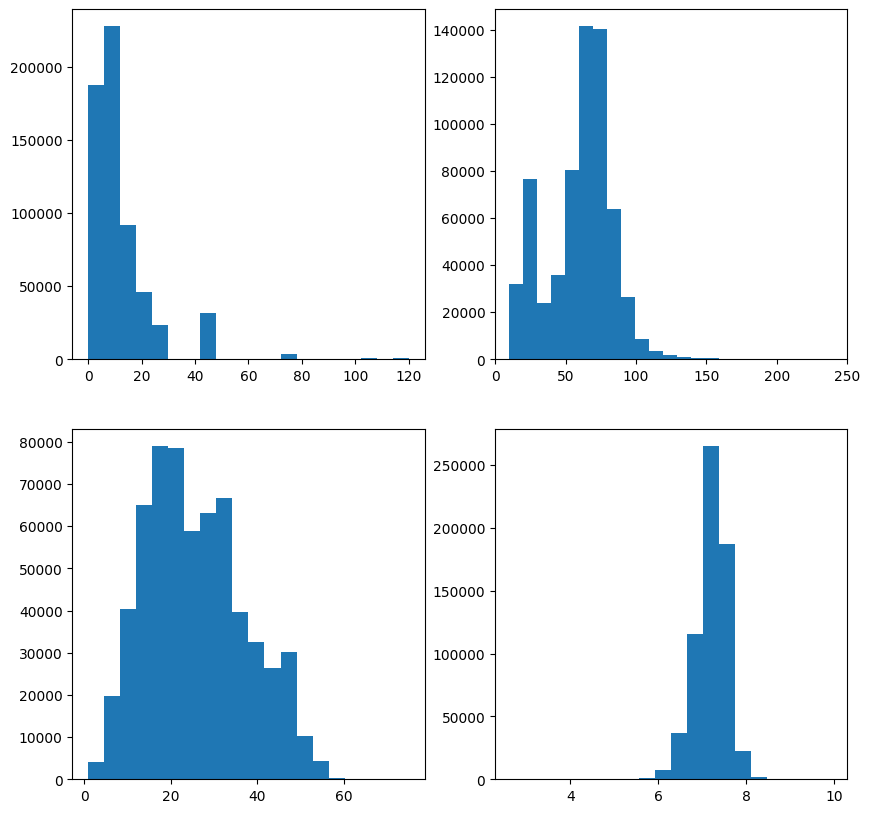

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0][0].hist(df["最寄駅：距離（分）"], bins = 20)
axes[0][1].hist(df["面積（㎡）"], bins = 200)
axes[0][1].set_xlim(0,250)
axes[1][0].hist(df["建築年"], bins = 20)
axes[1][1].hist(df["取引価格（総額）_log"], bins = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

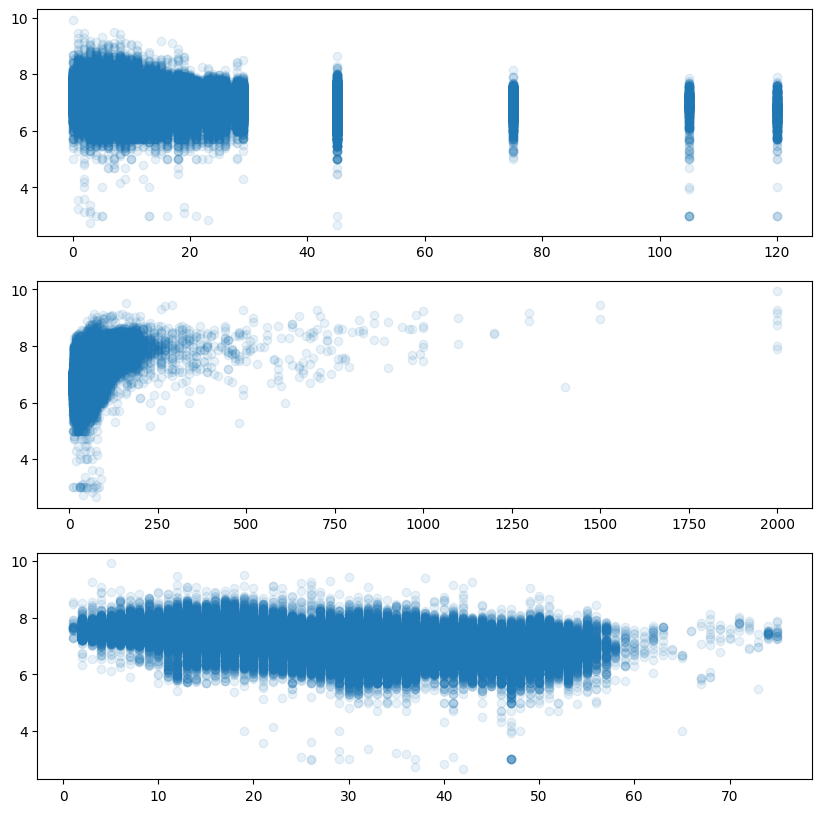

In [96]:
fig, axes = plt.subplots(3, 1, figsize=(10,10))
axes[0].scatter(df["最寄駅：距離（分）"],df["取引価格（総額）_log"], alpha=0.1)
axes[1].scatter(df["面積（㎡）"],df["取引価格（総額）_log"], alpha=0.1)
axes[2].scatter(df["建築年"],df["取引価格（総額）_log"], alpha=0.1)
plt.show

In [98]:
df[["取引価格（総額）_log", "最寄駅：距離（分）", "面積（㎡）", "建築年"]].corr()

,取引価格（総額）_log,最寄駅：距離（分）,面積（㎡）,建築年
取引価格（総額）_log,1.000000,-0.215520,0.382755,-0.541508
最寄駅：距離（分）,-0.215520,1.000000,0.151880,0.118339
面積（㎡）,0.382755,0.151880,1.000000,-0.067965
建築年,-0.541508,0.118339,-0.067965,1.000000


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from current font.
  fig.canvas.draw()
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from current font.
  fig.canvas.draw()
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  fig.canvas.draw()
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.draw()
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Gly

<Axes: >

findfont: Font family 'AppleGothic' not found.
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from current font.
  func(*args, **kwargs)
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from current font.
  func(*args, **kwargs)
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  func(*args, **kwargs)
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  func(*args, **kwargs)
C:\Users\komco\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyp

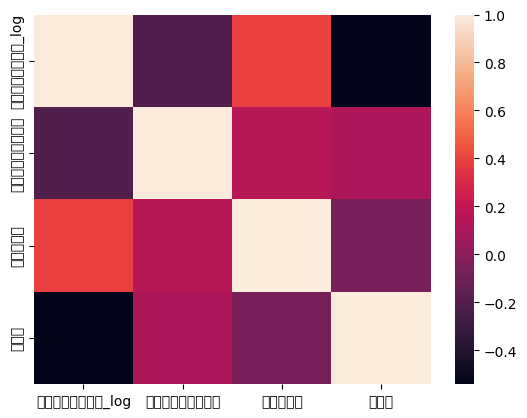

In [103]:
import matplotlib
matplotlib.rcParams["font.family"] = "AppleGothic"
sns.heatmap(df[["取引価格（総額）_log", "最寄駅：距離（分）", "面積（㎡）", "建築年"]].corr())

<Axes: xlabel='取引時点', ylabel='count'>

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

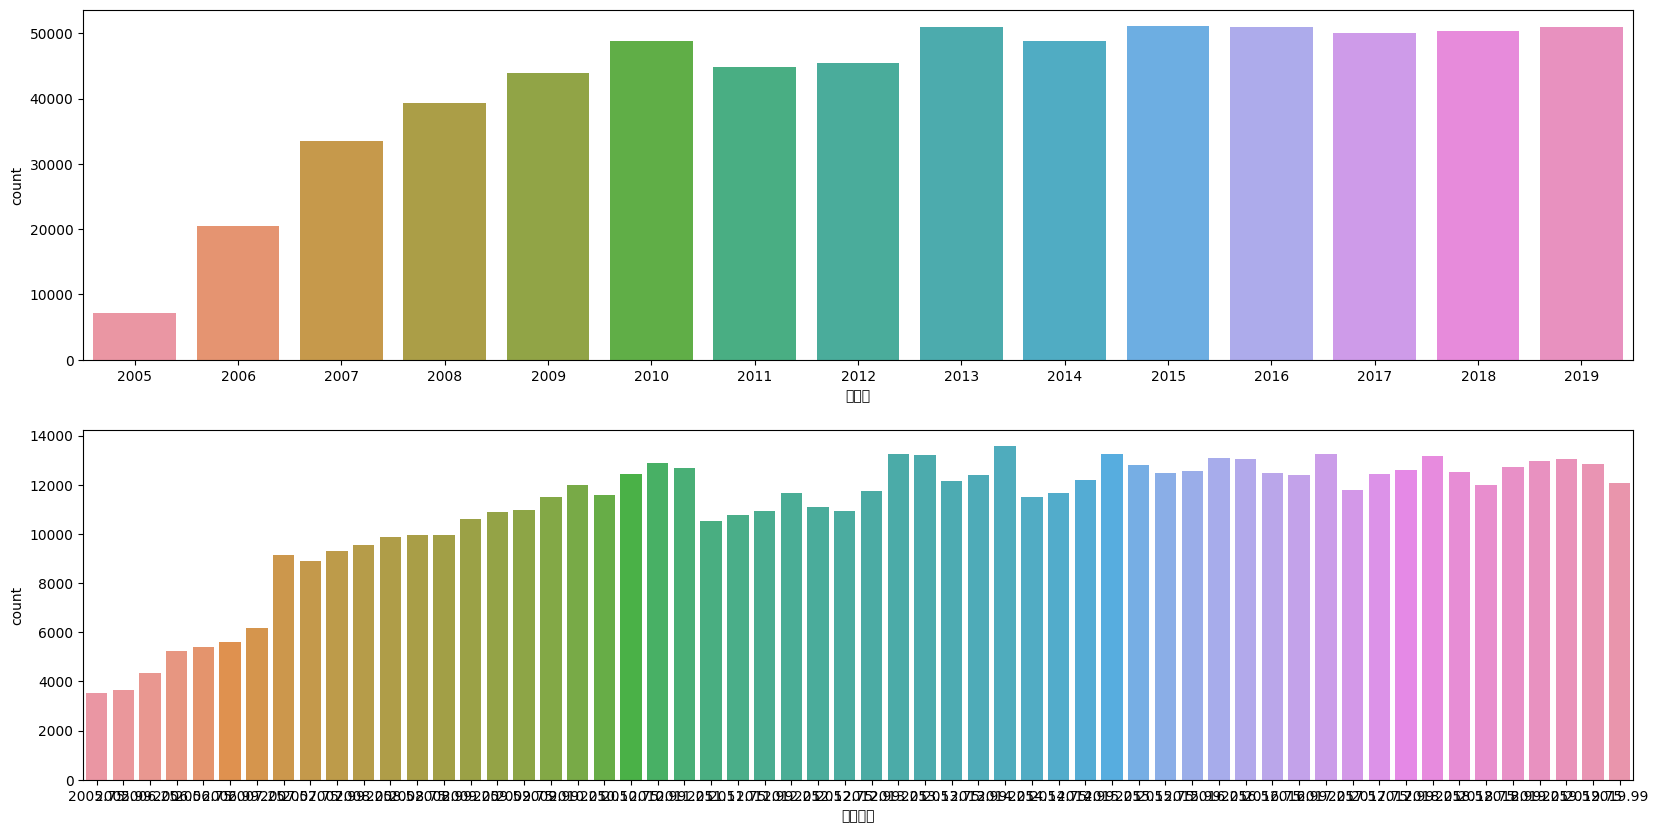

In [110]:
fig, axes = plt.subplots(2, 1, figsize=(20,10))
df["取引年"] = df["取引時点"].apply(lambda x:str(x)[:4])
sns.countplot(x="取引年", data=df.sort_values("取引年"), ax=axes[0])
sns.countplot(x="取引時点", data=df)